# Building Trees using scikit-learn - Lab

## Introduction
Following the toy example we saw in the previous lesson, we shall now grow a decision tree for a more complex dataset. This lab covers all major areas of standard machine learning practice , from data acquisition to evaluation of results. We shall use scikit learn, pandas and graphviz libraries to conduct this analysis following the example of play tennis dataset.

## Objectives

You will be able to:

- Use pandas to prepare the data for the scikit-learn decision tree algorithm
- Train the classifier with a training dataset and evaluate performance using different measures
- Visualize the decision tree and interpret the visualization

## UCI Banknote Authentication Data Set

In this lab we shall work with a popular dataset for classification called the ["UCI Bank Note Authentication Dataset'](https://archive.ics.uci.edu/ml/datasets/banknote+authentication). This Data were extracted from images that were taken from genuine and forged banknote-like specimens. The notes were first digitized, followed by a numerical transformation using DSP techniques. The final set of engineered features are all continuous in nature (visit the UCI link to learn about feature engineering in detail). 

We have following attributes in the dataset. 

1. __Variance__ of Wavelet Transformed image (continuous) 
2. __Skewness__ of Wavelet Transformed image (continuous) 
3. __Curtosis__ of Wavelet Transformed image (continuous) 
4. __Entropy__ of image (continuous) 
5. __Class__ (integer) - Target/Label 

## Step 1: Import necessary Libraries
- Import necessary libraries as we saw in previous lesson

In [1]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pandas as pd 
import numpy as np 

## Your code here 
df = pd.read_csv('data_banknote_authentication.csv')
df.columns = ['Variance','Skewness','Curtosis','Entropy', 'Class']
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


## Step 2: Import Data
- Read the file `"data_banknote_authentication.csv"` as a pandas dataframe. Note that there is no header information in this dataset.
- Assign column names 'Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class' to dataset in the given order.
- View the basic statistics and shape of dataset.
- Check for frequency of positive and negative examples in the target variable

In [2]:
print(df.Class.value_counts(normalize=True))
df.describe().round(3)
## Your code here 

0    0.555069
1    0.444931
Name: Class, dtype: float64


,Variance,Skewness,Curtosis,Entropy,Class
count,1371.000,1371.000,1371.000,1371.000,1371.000
mean,0.431,1.917,1.401,-1.192,0.445
std,2.842,5.868,4.310,2.102,0.497
min,-7.042,-13.773,-5.286,-8.548,0.000
25%,-1.775,-1.711,-1.553,-2.417,0.000
50%,0.496,2.313,0.617,-0.587,0.000
75%,2.815,6.813,3.182,0.395,1.000
max,6.825,12.952,17.927,2.450,1.000


In [3]:
# Shape of dataset
df.shape
## Your code here 

(1371, 5)

In [4]:
# Class frequency of target variable 
df.Class.value_counts()
## Your code here 

0    761
1    610
Name: Class, dtype: int64

In [5]:
## Your Observations 

# Features are continuous negative and positive values (Real)
# Class is relatively evenly split
# No missing data


## Step 3: Create Features and Labels, Training and Test Data

So now we need to create our feature set X and labels y. 
- Create X and y by selecting the appropriate columns from the dataset
- Create a 80/20 split on the dataset for training/testing. Use random_state=10 for reproducibility

In [6]:
# Create features and labels
X = df.iloc[:, :-1]
y = df.Class
## Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 10)

## Step 4: Train the Classifier and Make PRedictions
- Create an instance of decision tree classifier with random_state=10 for reproducibility
- Fit the traiing data to the model 
- USe the trained model to make predictions with test data

In [7]:
# Train a DT classifier
clf = DecisionTreeClassifier(random_state=10)
clf.fit(X_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [8]:
# Make predictions for test data
y_pred = clf.predict(X_test)


## Step 5: Check Predictive Performance

We can now use different evaluation measures to check the predictive performance of the classifier. 
- Check the accuracy , AUC and create a confusion matrix 
- Interpret the results 

In [9]:
# Calculate Accuracy , AUC and Confusion matrix 
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy is :{0}".format(acc))

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_pos_rate, true_pos_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)



Accuracy is :98.54545454545455

AUC is :0.99

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,152,4,156
1,0,119,119
All,152,123,275


In [10]:
# Your observations here 

# The classifier seems to perform well with a high accuracy 97% and AUC of 0.98
# We see a small number (3) for false positive and false negative errors. 

## Step 6: Visualize the tree 

- Use graphviz to visualize the tree 
- Interpret the results 

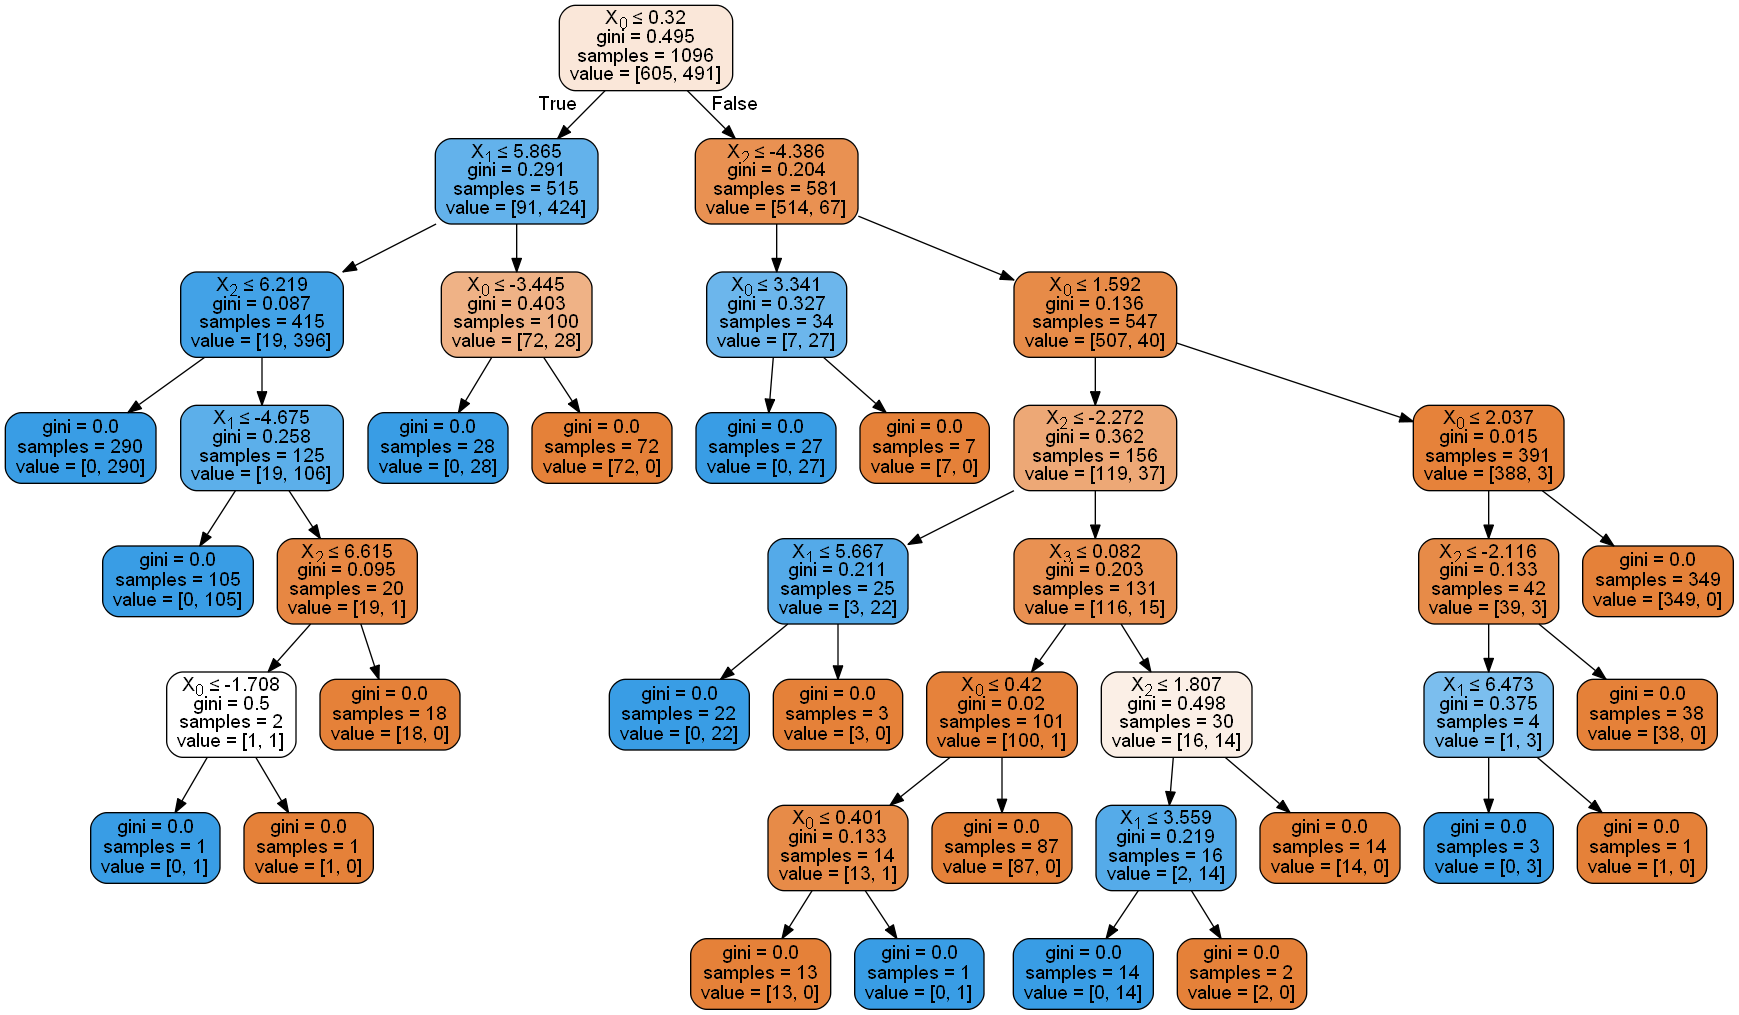

In [11]:
# Visualize the tree trained from complete dataset
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [12]:
## Your observations here

# We see a deep tree with 8 layers
# Deep trees trying to classify every single example could lead to overfitting in most cases

## Bonus: Re-grow the Tree Using Entropy 

SO in the above example, we used all default settings for decision tree classifier. The default impurity crietrion in scikit learn is the Gini impurity. We can change it back to entropy by passing in `criterion='entropy'` argument to the classifier in the training phase. 
- Repeat the above tasks for training, evaluation and visualization using Entropy measure. (
- Compare and interpret the results 

Accuracy is :98.54545454545455

AUC is :0.99

Confusion Matrix
----------------
Predicted    0    1  All
True                    
0          152    4  156
1            0  119  119
All        152  123  275


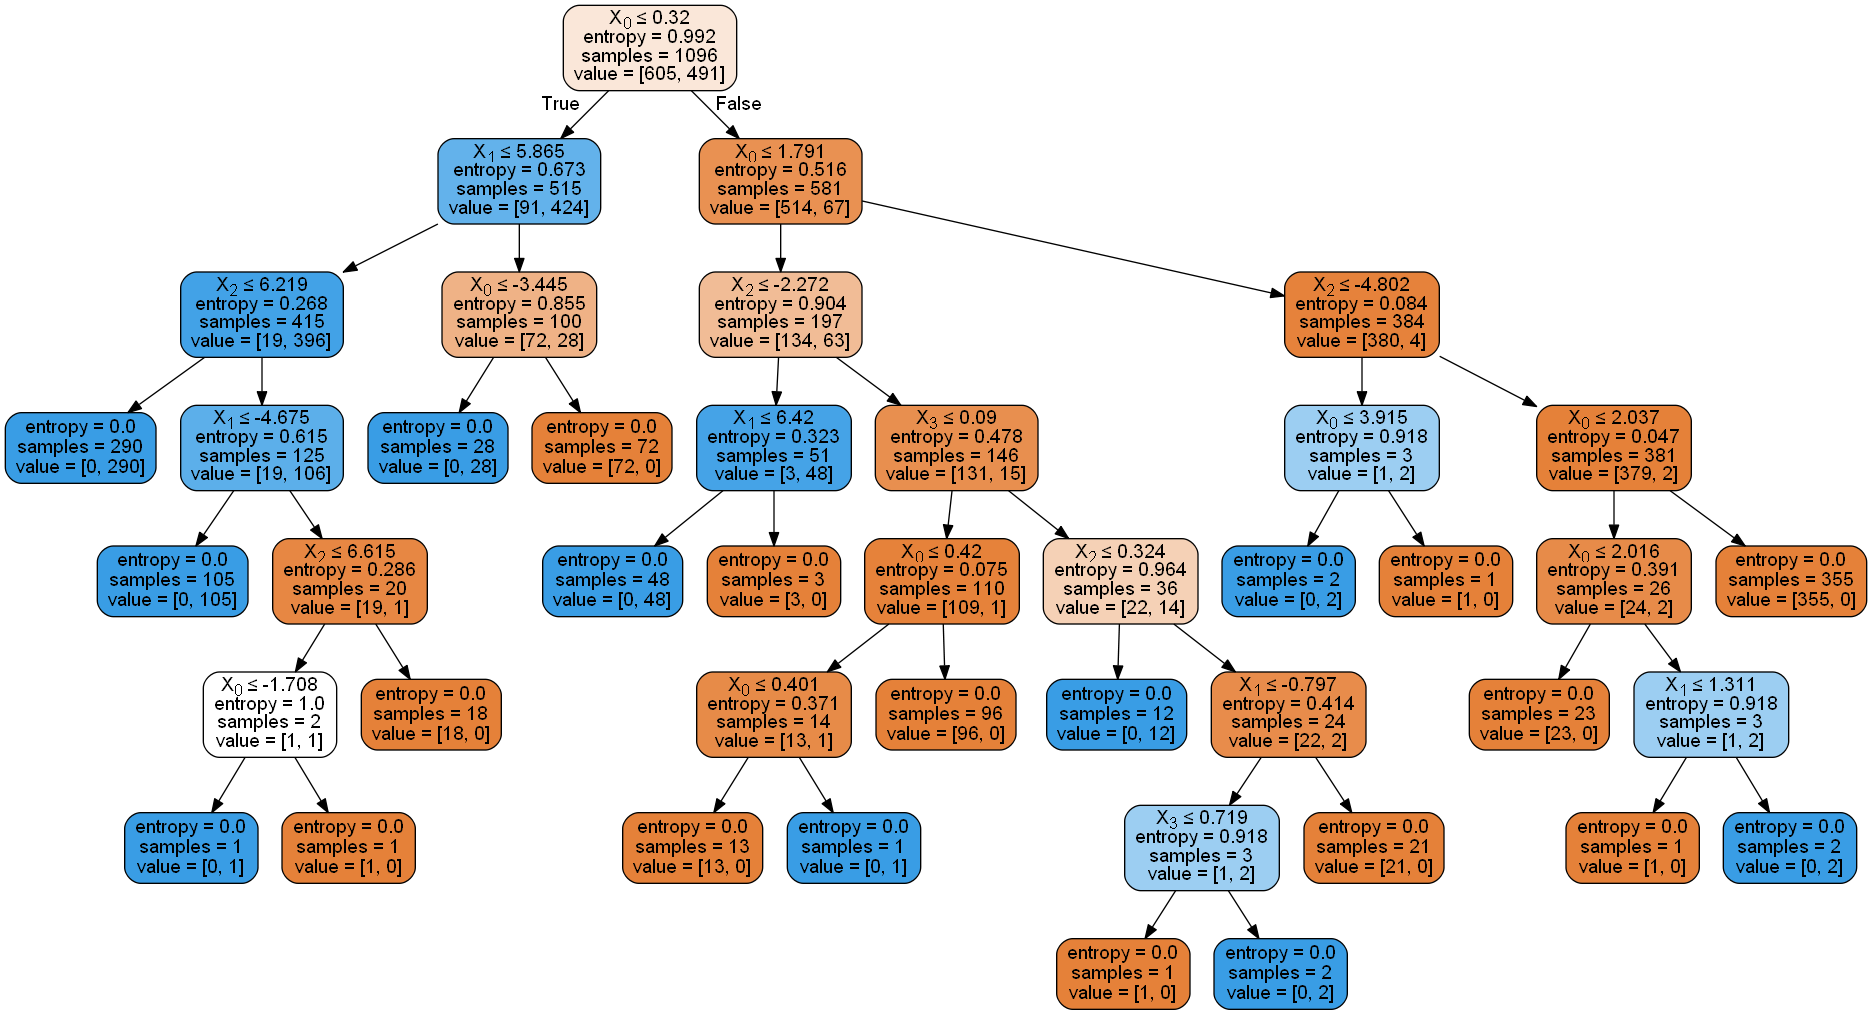

In [13]:
# Train a DT classifier
classifier2 = DecisionTreeClassifier(random_state=10, criterion='entropy')  
classifier2.fit(X_train, y_train)  

# Make predictions for test data
y_pred = classifier2.predict(X_test) 

# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

# Visualize the tree trained from complete dataset
dot_data = StringIO()
export_graphviz(classifier2, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [14]:
# Your observations here 

# With entropy we see a much lower accuracy and AUC than earlier
# Only one false positive value , leading to accuracy of 99%
# The tree shape changes considerably with change in impurity criteria 

## Level up - Optional 

- We discussed earlier that decision trees are very sensitive towards outliers. Try to identify and remove/fix any possible outliers in the dataset. 
- Check the distributions of the data. Is there any room for normalization/scaling of data ? Apply these techiques and see if it improves upon accuracy score. 

In [27]:
# look for outliers

from sklearn import preprocessing

# Get column names first
names = df.columns[:4]

scaled_df = pd.DataFrame()

# z-scores
for col in df.columns[:4]:
    df[col] = (df[col] - df[col].mean()) / df[col].std()

df.shape

(1371, 5)

In [28]:
# Create features and labels
X = df.iloc[:, :-1]
y = df.Class

## Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 10)

Accuracy is :98.54545454545455

AUC is :0.99

Confusion Matrix
----------------
Predicted    0    1  All
True                    
0          152    4  156
1            0  119  119
All        152  123  275


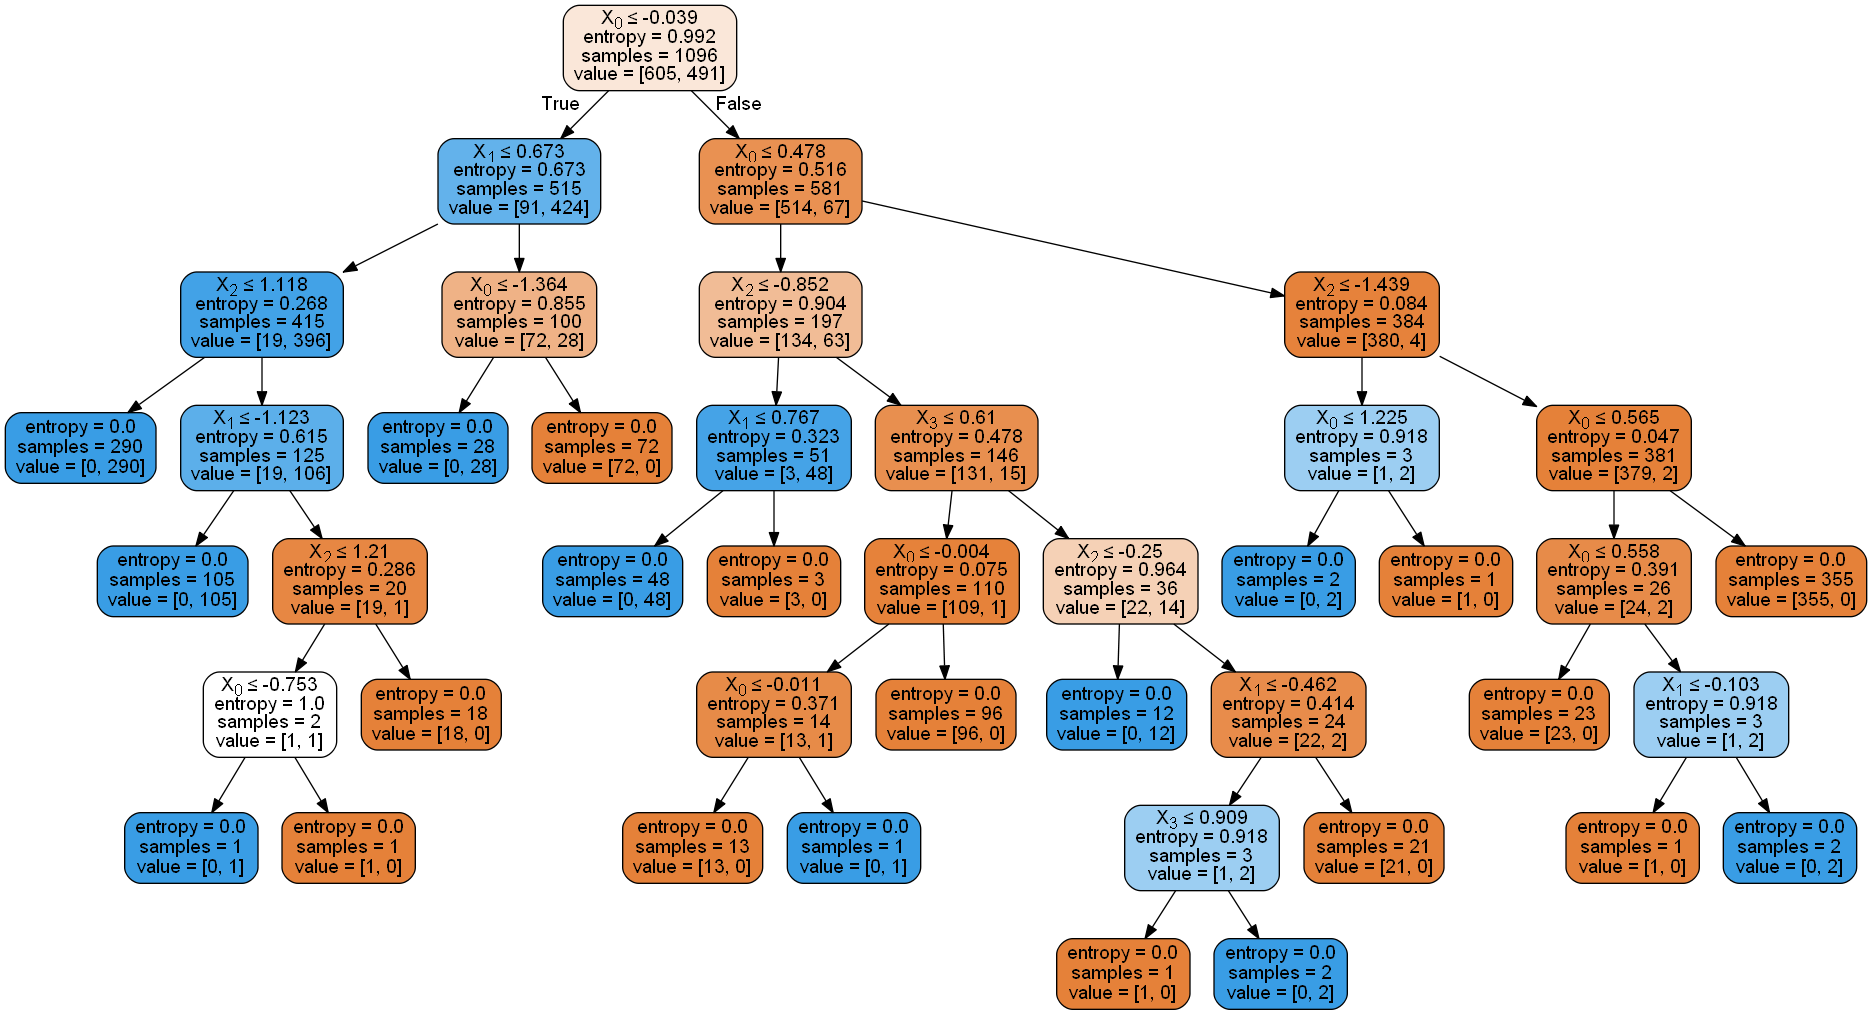

In [29]:
# Train a DT classifier
clf3 = DecisionTreeClassifier(random_state=10, criterion='entropy')  
clf3.fit(X_train, y_train)  

# Make predictions for test data
y_pred = clf3.predict(X_test) 

# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

# Visualize the tree trained from complete dataset
dot_data = StringIO()
export_graphviz(clf3, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [30]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1.371000e+03,1371.000000,1.371000e+03,1.371000e+03,1371.000000
mean,-4.146128e-17,0.000000,-2.073064e-17,-1.943498e-17,0.444931
std,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,0.497139
min,-2.629208e+00,-2.673752,-1.551423e+00,-3.500052e+00,0.000000
25%,-7.761176e-01,-0.618356,-6.853764e-01,-5.827711e-01,0.000000
50%,2.262096e-02,0.067475,-1.819130e-01,2.881260e-01,0.000000
75%,8.384326e-01,0.834248,4.131932e-01,7.551136e-01,1.000000
max,2.249218e+00,1.880281,3.834409e+00,1.732754e+00,1.000000


In [31]:
for col in df.columns[:4]:
    df = df.loc[(df[col] < 3.5) & (df[col] > -3.5)]
    

In [32]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000
mean,0.012296,0.017811,-0.027096,0.008135,0.441176
std,0.994457,0.977676,0.952077,0.997262,0.496710
min,-2.629208,-2.590901,-1.551423,-3.178262,0.000000
25%,-0.766786,-0.579563,-0.703908,-0.550928,0.000000
50%,0.030985,0.077537,-0.191851,0.292125,0.000000
75%,0.841827,0.835040,0.392121,0.757574,1.000000
max,2.249218,1.880281,3.313540,1.732754,1.000000


In [33]:
# Create features and labels
X = df.iloc[:, :-1]
y = df.Class

## Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 10)

Accuracy is :98.16176470588235

AUC is :0.98

Confusion Matrix
----------------
Predicted    0    1  All
True                    
0          148    5  153
1            0  119  119
All        148  124  272


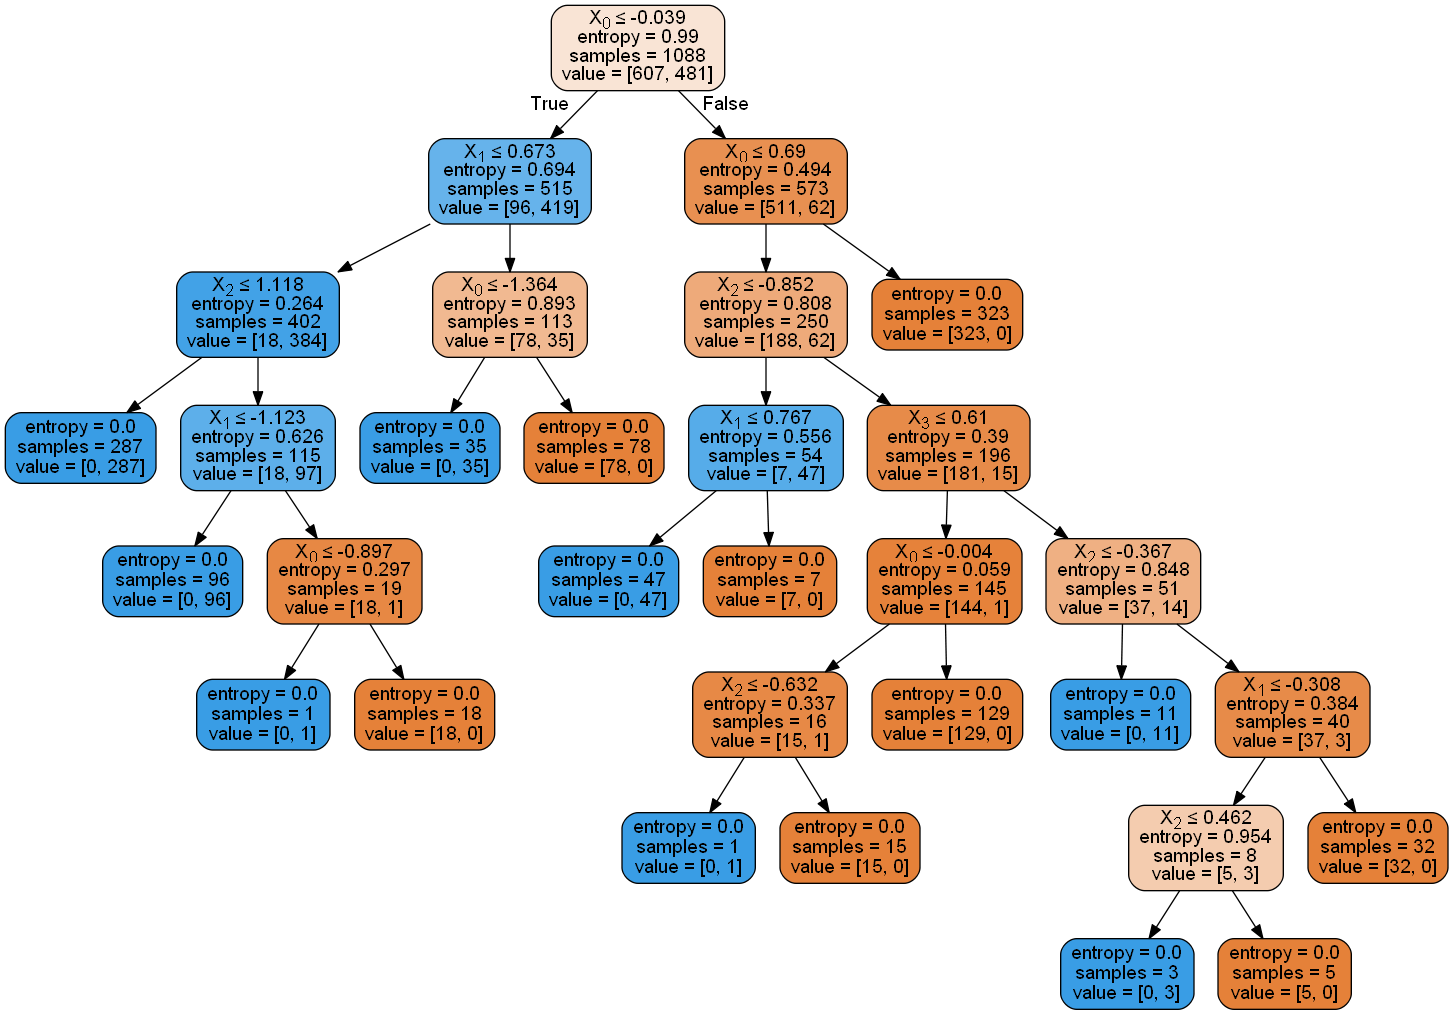

In [36]:
# Train a DT classifier
clf4 = DecisionTreeClassifier(random_state=10, criterion='entropy')  
clf4.fit(X_train, y_train)  

# Make predictions for test data
y_pred = clf4.predict(X_test) 

# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

# Visualize the tree trained from complete dataset
dot_data = StringIO()
export_graphviz(clf4, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Removing outliers appears to have simplified the tree without compromising prediction. 

## Summary 

In this lesson, we looked at growing a decision tree for banknote authentication dataset which is composed of extracted continuous features from photographic data. We looked at different stages of the experiment including data acquisition, training, prediction and evaluation. We also looked at growing trees using entropy vs. gini impurity criteria. In following lessons, we shall look at some more such pre-train tuning techniques for ensuring an optimal classifier for learning and prediction.  